In [2]:
import numpy as np
import pandas as pd

import dask
import dask.dataframe as dd
import dask.array as da
import dask.bag as db

In [3]:
datasets = []
for n in range(10):
    ds = {
        "metadata": {
            "id": n
        },
        "data1": [],
        "data2": []
    }
    for m in range(5):
        ds['data1'].append({
            "X": np.random.rand(10),
            "Y": np.random.rand(10)
        })
        ds['data2'].append({
            "X": np.random.rand(10),
            "Y": np.random.rand(10)
        })
    datasets.append(ds)


In [4]:
pdf = pd.DataFrame.from_records(datasets)
df = dd.from_pandas(pdf, npartitions=5)
b = df.to_bag(format='dict')
# partitions = b.to_delayed()

In [11]:
def calculate_stats(d):
    result = {
        "min_X": np.min(d['X']),
        "max_X": np.max(d['X']),
        "min_Y": np.min(d['Y']),
        "max_Y": np.max(d['Y']),
    }
    return result

def get_data(record):
    results = []

    for data in record['data1']:
        y = dask.delayed(calculate_stats)(data)
        results.append({f"data1_{k}": v for k, v in y.items()})

    for data in record['data2']:
        y = dask.delayed(calculate_stats)(data)
        results.append({f"data2_{k}": v for k, v in y.items()})

    result = {
        "data1": results1,
        "data2": results2
    }
    return result


result = b.map(lambda record: get_data(record))

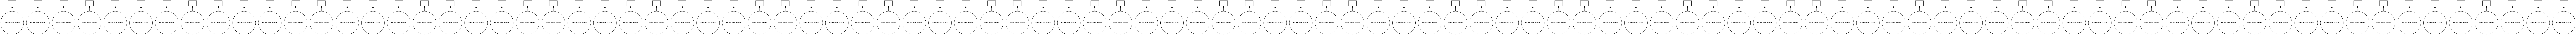

In [13]:
dask.visualize(*result)

In [12]:
dask.compute(*result)

({'data1': [{'min_X': 0.10400370834787798,
    'max_X': 0.862776060845936,
    'min_Y': 0.02578914116604558,
    'max_Y': 0.8455150030540354},
   {'min_X': 0.08381172889227229,
    'max_X': 0.8853884613840214,
    'min_Y': 0.11936637601241595,
    'max_Y': 0.9388767492649966},
   {'min_X': 0.09488101321933351,
    'max_X': 0.7442077144077877,
    'min_Y': 0.12303012063234675,
    'max_Y': 0.9015316884197506},
   {'min_X': 0.046492959746258666,
    'max_X': 0.9976637833680828,
    'min_Y': 0.2758373804972103,
    'max_Y': 0.8861208889118531},
   {'min_X': 0.021333095655494017,
    'max_X': 0.9640747557461181,
    'min_Y': 0.2005220060905163,
    'max_Y': 0.8362698655761575}],
  'data2': [{'min_X': 0.06945810520880513,
    'max_X': 0.9742022645041933,
    'min_Y': 0.10595300204075986,
    'max_Y': 0.7929643373224213},
   {'min_X': 0.12272638132411229,
    'max_X': 0.9531191379223358,
    'min_Y': 0.09337028209148224,
    'max_Y': 0.8325801533420494},
   {'min_X': 0.1655859814215893,
    

In [14]:
datasets

[{'metadata': {'id': 0},
  'data1': [{'X': array([0.86277606, 0.69069566, 0.80640991, 0.70331874, 0.76552989,
           0.10400371, 0.38191302, 0.4475153 , 0.76711413, 0.40626613]),
    'Y': array([0.05946361, 0.33766657, 0.59902567, 0.845515  , 0.21889821,
           0.03608557, 0.15746836, 0.16411181, 0.04934057, 0.02578914])},
   {'X': array([0.72627903, 0.42700009, 0.88538846, 0.66226885, 0.54040716,
           0.08381173, 0.23423841, 0.13401906, 0.79446706, 0.14363808]),
    'Y': array([0.66118292, 0.21327619, 0.4689178 , 0.33760853, 0.62737755,
           0.28664337, 0.93887675, 0.19571303, 0.65670314, 0.11936638])},
   {'X': array([0.74420771, 0.09488101, 0.31750107, 0.55629959, 0.21082458,
           0.5546586 , 0.15084397, 0.45035997, 0.15719525, 0.21845992]),
    'Y': array([0.85841769, 0.90153169, 0.62914887, 0.43924657, 0.42928142,
           0.67437739, 0.80910043, 0.71252692, 0.5092203 , 0.12303012])},
   {'X': array([0.72327085, 0.15373545, 0.77768495, 0.07229092, 0.231